# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'Traffic_Sign_Data/train.p'
validation_file= 'Traffic_Sign_Data/valid.p'
testing_file = 'Traffic_Sign_Data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = test['sizes'][1]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(test['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [42 45]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

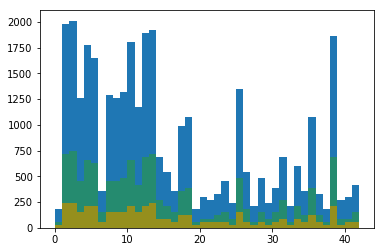

(34799, 32, 32, 3)
255 0 uint8
float64


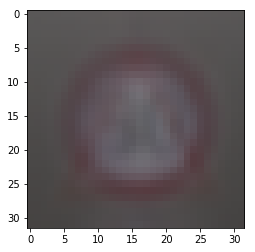

Average of Each Image


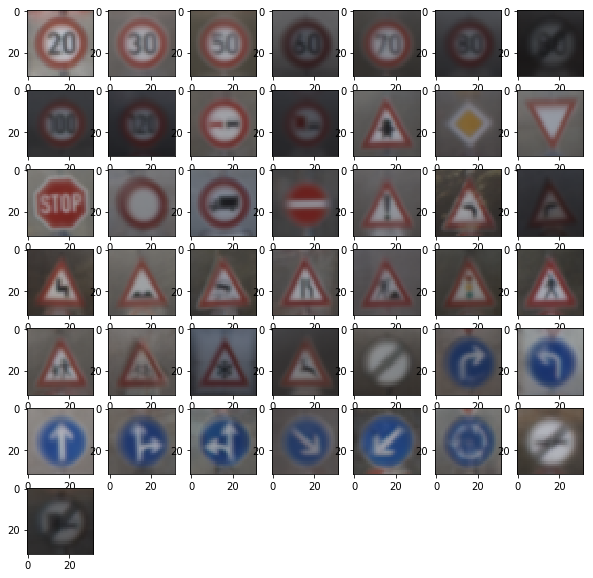

Loaded


In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#visualize class frequency
plt.hist(y_train, bins=np.arange(n_classes))
plt.hist(y_valid, bins=np.arange(n_classes))
plt.hist(y_test, bins=np.arange(n_classes), alpha=0.5)
plt.show()

#calculate average image
print(X_train.shape)
print(np.max(X_train), np.min(X_train), X_train.dtype)
mean_image = np.mean(X_train, axis=0)
print(mean_image.dtype)
plt.imshow(mean_image.astype(np.uint8))
plt.show()

#average class 10 
print("Average of Each Image")

fig = plt.figure(figsize = [10,10])
for i in range(0, n_classes):
    mean_image = np.mean(X_train[y_train == i], axis=0)
    plt.subplot(7,7, i+1)
    plt.imshow(mean_image.astype(np.uint8))

plt.show()
print("Loaded")







#### Data Visualization

I visualized the data in the following ways.

First I created a histogram of the classes and their frequencies in each of the three data sets. This allowed me to see the magnitude of the training set, validation set, and test set, as well as potential overfitting pitfalls. For example, The test set seems to skew heavily towards lower number classes (0-12), and seeing as those are circular speed signs, the network may be trained to lean towards associating circular signs with speed signs.

Second, I took the mean of all image values in the train set to get an idea of the "average" traffic sign. As evidenced via the histogram it is mostly circular, red bordered with a white infill, with a speed marker in the center. The faint outline of a triangle is evident, which tells me that triangular signs have a strong presence in the training set.

Finally, I wanted to see the average image for every class. This analysis gives insight into lighting condition variations between classes, like between the 20 and 60 kph speed signs. All the images seem relatively well centered, and without much distortion. While this means the model will likely have an easier time learning from this data, it may mean that models trained from this data may be brittle and augumenting the set with shifted or distorted images may be helpful.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to norfrom sklearn.utils import shufflemalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

X_train = (X_train - 127.5)/127.5

X_valid = (X_valid - 127.5)/127.5

X_test = (X_test - 127.5)/127.5


#### Rubric Question 1

<strong>Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc.</strong>

I decided to only normalize and shuffle the data. Looking at the mean images for each class, the color variation stood out as a powerful feature, so maintaining the RGB channels would be useful, so I decided only to normalize the data. 

While I ended up only executing a singular pre-process on the data, I did consider a range of options such as Gaussian blurring, brightness adjustment, and augmenting the data set by offsetting each image to prevent overfitting to centered images. All could be useful, but I did not feel there was much to be gained in this particular case.

### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

input_data = tf.placeholder(tf.float32, [None,32,32,3])
label_data = tf.placeholder(tf.int32, [None])

#mean and sigma variable
mu = 0
sigma = 0.1

def conv_layer(input_data,h,w,d,fd):
    W = tf.Variable(tf.truncated_normal(shape = (h,w,d,fd), mean=mu, stddev=sigma), trainable=True)
    b = tf.Variable(tf.zeros(fd), trainable=True)
    conv = tf.nn.relu(tf.nn.conv2d(input_data, W, strides=[1, 1, 1, 1], padding='SAME') + b)
    return conv

def mpool(input_data):
    mpool = tf.nn.max_pool(input_data, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    return mpool

#Layer One - Convolution 1
l1c1 = conv_layer(input_data,3,3,3,32)
l1c2 = conv_layer(l1c1,3,3,32,32)
l1c3 = conv_layer(l1c2,3,3,32,32)

#Layer Two - Max Pool 1
l2_mp = mpool(l1c3)

#Layer Three - Convolution 2
l3c1 = conv_layer(l2_mp,3,3,32,64)
l3c2 = conv_layer(l3c1,3,3,64,64)
l3c3 = conv_layer(l3c2,3,3,64,64)

#Layer Four - Max Pool 2
l4_mp = mpool(l3c3)

#Layer Five - Convolution 3
l5c1 = conv_layer(l4_mp,3,3,64,128)
l5c2 = conv_layer(l5c1,3,3,128,128)
l5c3 = conv_layer(l5c2,3,3,128,128)

#Layer Six - Avg Pool 1
l6_mp = tf.nn.avg_pool(l5c3, ksize=[1, 8, 8, 1], strides=[1, 8, 8, 1], padding='VALID')

#Layer Seven - Flatten
l7_f = flatten(l6_mp)

#Layer Eight - Fully Connected Linear Output
clf_W  = tf.Variable(tf.truncated_normal(shape=(l7_f.get_shape().as_list()[-1], n_classes), mean = mu, stddev = sigma), trainable=True)
clf_b  = tf.Variable(tf.zeros(n_classes), trainable=True)
logits = tf.matmul(l7_f, clf_W) + clf_b
    

/home/alec/anaconda3/envs/dev/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


#### Description of the Architecture

Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

The model I created is inspired by the VGG16 design, shown in the figure below.

There are 9 layers in total.

Layer 1: 3 convlutions with RELU activation. 3x3x3 (3x3 sample size and 3 channels deep for the RGB), and I start with 16 filters. VGG begins with 128, but I wanted a less computationally intensive model so I could at least solve a single epoch on my CPU before moving to an AWS instance to burn through the full training set.

Layer 2: I do a max pooling on the output of the convolve, setting up the pool in such a way that it reduces the output image to an 16x16.

Layer 3: 3 more convolutions, this time doubling the filter count to 32.

Layer 4: Max pool again, outputting an 8x8 image.

Layer 5: 3 more convolutions, doubling the filter count to 64.

Layer 6: Average pool instead of max pool. Max pooling is helpful in highlighting distinct pixels nestled in a sea of static values. At this layer I am interested in taking the average, smoothing out the image and leveraging more information in my final output, a 4x4 image.

Layer 7: I flatten the pool, preparing to generate the logits.

Layer 8: To generate teh fully connected output I perform a linear operation and define the logits.


![alt text](vgg16.png "https://www.cs.toronto.edu/~frossard/post/vgg16/")


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from tqdm import tqdm

rate = 0.001
EPOCHS = 10
BATCH_SIZE = 128


var_rate = tf.placeholder(tf.float32, [])

cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=label_data, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = var_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.cast(label_data, tf.int64))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={input_data: batch_x, label_data: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
counter = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in tqdm(list(range(0, num_examples, BATCH_SIZE))):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={input_data: batch_x, label_data: batch_y, var_rate: rate})
            counter += 1
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './baseline-traffic-sign-classifer')
    print("Model saved")
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...



100%|██████████| 272/272 [00:04<00:00, 56.41it/s]


EPOCH 1 ...
Validation Accuracy = 0.501



100%|██████████| 272/272 [00:03<00:00, 68.89it/s]


EPOCH 2 ...
Validation Accuracy = 0.847



100%|██████████| 272/272 [00:03<00:00, 68.62it/s]


EPOCH 3 ...
Validation Accuracy = 0.899



100%|██████████| 272/272 [00:03<00:00, 69.11it/s]


EPOCH 4 ...
Validation Accuracy = 0.937



100%|██████████| 272/272 [00:03<00:00, 69.56it/s]


EPOCH 5 ...
Validation Accuracy = 0.918



100%|██████████| 272/272 [00:03<00:00, 68.45it/s]


EPOCH 6 ...
Validation Accuracy = 0.942



100%|██████████| 272/272 [00:03<00:00, 69.74it/s]


EPOCH 7 ...
Validation Accuracy = 0.931



100%|██████████| 272/272 [00:03<00:00, 68.84it/s]


EPOCH 8 ...
Validation Accuracy = 0.953



100%|██████████| 272/272 [00:03<00:00, 69.39it/s]


EPOCH 9 ...
Validation Accuracy = 0.953



100%|██████████| 272/272 [00:03<00:00, 68.49it/s]


EPOCH 10 ...
Validation Accuracy = 0.947

Model saved
INFO:tensorflow:Restoring parameters from ./baseline-traffic-sign-classifer
Test Accuracy = 0.954


#### Model Training

Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

Optimizer: ADAM

The Momentum Optimzer was tested in training, but was found to take a little longer to converge than ADAM, but more stable towards the end. Results ended up not being better than ADAM, though more stable, so I reverted back to ADAM.

Batch Size: 128

Did not modify.

Epochs: 10

There was a good amount of tweaking of this value. Started with 10, jumped to 100, began seeing some strange oscillations at various points, which resulted in modifications to the model architecture. With larger numbers of filters on the convolutions and more layers (ending with a 2x2 pool instead of a 4x4 pool), the system became unstable in the mid-teens of epochs. This epoch number was chosen after moving to a variable learning rate, and the variability of the learning rate is tied to the epoch number.

Learning Rate: Variable with epoch count

The learning rate starts at 0.001, but the validation accuracy would be unstable and never fully settle with the ADAM optimizer. To improve the settling time and stability of the accuracy value, the learning rate was made variable, slowing down as the epochs increased, allowing the optimizer to make finer adjustments.

#### Model Development

Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.
My final model results were:

training set accuracy of ?
validation set accuracy of ?
test set accuracy of ?
If an iterative approach was chosen:

My approach was a hybrid of the iterative approach and choosing a well-known architecture. I essentially implemented the VGG16 architecture, and I chose it mostly because it was relatively easy to implement, and it was recommended to me by a friend.

Unfortunately, the exact architecture of VGG16 was too computationally expensive for me, and, later, when testing with larger numbers of filters, it proved to be unnecessary for this data set. 

VGG16 is meant for image recognition, with a 7.3% top-5 score on ImageNet, making significantly better than LeNet.

Given LeNet was estimated to have a 0.89 validation accuracy and this network, while not fully VGG16, performs better with 94.7% validation accuracy and a 95.4% test accuracy..


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

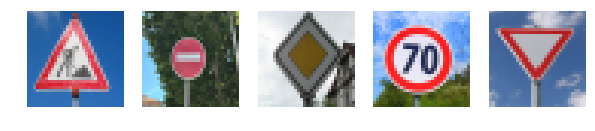

In [7]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import matplotlib.image as mpimg
import cv2

fig, axs = plt.subplots(1,5, figsize=(10, 5))
axs = axs.ravel()

new_train = []

for i, img in enumerate(glob.glob('./New_Sign_Testing/*.jpg')):
    image = cv2.imread(img)
    image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    new_train.append(image)

#https://github.com/jeremy-shannon/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb

#### New Test Images

I wanted to test how robust the neural network was at classifying German traffic signs so I selected images that had more variance in the background image, had the signs set at an off-angle, and with varying levels of lightness. All of these images were scaled and cropped to the appropriate size, but intentionally chosen to be different from the training set.

### Predict the Sign Type for Each Image

In [8]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

new_train = np.asarray(new_train)

new_train_normalized = (new_train - 127.5)/127.5 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(new_train_normalized)
    pred_logits = sess.run(logits, feed_dict={input_data: new_train_normalized})
    #Print the predicted class for each of the images
    print(np.argmax(pred_logits, 1))

INFO:tensorflow:Restoring parameters from ./baseline-traffic-sign-classifer
[38  7 39  4 13]


### Analyze Performance

In [9]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

import tensorflow as tf

read_labels = [26,18,13,5,14]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    new_saver = saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './baseline-traffic-sign-classifer')
    accuracy = evaluate(new_train_normalized, read_labels)
    print("Test Set Accuracy = {:.3f}".format(accuracy))


INFO:tensorflow:Restoring parameters from ./baseline-traffic-sign-classifer
INFO:tensorflow:Restoring parameters from ./baseline-traffic-sign-classifer
Test Set Accuracy = 0.000


#### Performance on New Set

It appears that the new set of images were too different from the training set. None of the images were correctly classified. This is somewhat understandable because the training set is much more curated and controlled than this new set, but this also gives insight into potential augmentations I might want to do to the training set to imrpove robustness. Some options include distorting the images to adjust for different camera angles, increasing lightness of the image, and potentially using HSL instead of an RGB colorspace.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [10]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits)
top_5 = tf.nn.top_k(softmax, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    new_saver = saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './baseline-traffic-sign-classifer')
    softmax_calc = sess.run(softmax, feed_dict={input_data: new_train_normalized})
    top_5_out_i, top_5_prob = sess.run(top_5, feed_dict={input_data: new_train_normalized})
    #print(softmax_calc)
    #print(top_5_out)
    merged = np.stack([top_5_out_i, top_5_prob], 2)
    for index1,output in enumerate(merged):
        print("Image:", index1+1)
        for index2, (prob,predict) in enumerate(output):
            print("Rank: %d Predicted Class: %d Probability: %2.2f" % (index2+1, predict, prob*100))
        print()

INFO:tensorflow:Restoring parameters from ./baseline-traffic-sign-classifer
INFO:tensorflow:Restoring parameters from ./baseline-traffic-sign-classifer
Image: 1
Rank: 1 Predicted Class: 38 Probability: 95.81
Rank: 2 Predicted Class: 11 Probability: 3.69
Rank: 3 Predicted Class: 25 Probability: 0.24
Rank: 4 Predicted Class: 1 Probability: 0.13
Rank: 5 Predicted Class: 28 Probability: 0.10

Image: 2
Rank: 1 Predicted Class: 7 Probability: 47.91
Rank: 2 Predicted Class: 5 Probability: 24.82
Rank: 3 Predicted Class: 34 Probability: 23.62
Rank: 4 Predicted Class: 10 Probability: 2.87
Rank: 5 Predicted Class: 8 Probability: 0.36

Image: 3
Rank: 1 Predicted Class: 39 Probability: 99.30
Rank: 2 Predicted Class: 35 Probability: 0.70
Rank: 3 Predicted Class: 11 Probability: 0.00
Rank: 4 Predicted Class: 32 Probability: 0.00
Rank: 5 Predicted Class: 38 Probability: 0.00

Image: 4
Rank: 1 Predicted Class: 4 Probability: 61.90
Rank: 2 Predicted Class: 8 Probability: 24.54
Rank: 3 Predicted Class: 1

#### Prediction Probabilities

Looking at the probabilities is quite insightful. First, none of the images contain an accurate label even in their top 5 predictions. Additionally, the classifier is incredibly confident in these predictions, with three of the five with 90%+ probabilities. Looking at the  Taking a higher level view, however, some trends to appear. 

Image 1 is interesting in that 25 is the third most likely lablel, though the confidence in that prediction is quite low, and 25 shares many similarities with the actual label. It is likely that the blue of the background is dominating the classification.

Image 2 shows that the classifier is likely focusing heavily on outlines, as it has ignore the distinct difference in color concentration, though the hues are similar, and labeled this as a speed limit sign with low confidence.

Image 3 this classification likely is influenced more by the dark colored outline of the house in the background than the sign itself, especially given the incredibly high confidence of the prediction.

Image 4, the speed sign, was close; the classifier labled it as a 60 kmph sign instead of a 70 kmph. 

Image 5 was classified as 14 instead of 13, and while the colors are quite different, further supporting that the classifier has more heavily weighted edges and overall shape relative to colors, and the distorted triangular shape is being interpreted as part of a full diamond.


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [11]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")